In [1]:
#dataset refer to automobiles data preparation note book 


### linear Regression Models

In [3]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ridge
from sklearn.linear_model import ElasticNet

# not Recommended that you disable warnings  
import warnings 
warnings.filterwarnings("ignore")  

In [4]:
# import Data 
data = pd.read_csv('auto-mpg-processed.csv')

In [5]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,26.0,4,98.0,90,2265,15.5,47
1,18.0,6,232.0,100,2945,16.0,47
2,29.8,4,134.0,90,2711,15.5,40
3,27.9,4,156.0,105,2800,14.4,40
4,23.0,8,350.0,125,3900,17.4,41


In [6]:
# intantiate a dictionary that holds the training and test scores 
result_dict = {}

In [7]:
# function to build and train diffrent models  
# regression_fn : intantiate a particular regression model  
#name_of_y_col : specifies the column name for the target values we use in training  
#names_ofx_cols: list of feature columns 
#datasets: original dataframe that contain features and target values 
#test_frac= 0.2: fraction of that data that will be used as test data 20%
#preprocess_fn = None: preprocess function that standardize or scale our data 
#show_plot_Y = False : set to True to display acrual versus predicted values
#show_plot_scater = False: set to true to see how regression line fits in our training data

def build_model(regression_fn,
               name_of_y_col,
               names_of_x_cols,
               datasets,
               test_frac= 0.2,
               preprocess_fn = None,
               show_plot_Y = False,
               show_plot_scatter = False):
    
    X = datasets[names_of_x_cols]
    Y = datasets[name_of_y_col]
    
# apply preprocssor funtion to x values if trigred 
    if preprocess_fn is not None : 
        X = preprocess_fn(X)
# split data set to train and test sets 
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = test_frac)
    
# passing training data to regression function 
    model = regression_fn(x_train,y_train) 
    y_pred = model.predict(x_test)
    
# print r-square values     
    print("training_score : ", model.score(x_train, y_train))
    print("test_score : ", r2_score(y_test,y_pred))
    
#plotting actual values vs predicted values if called = True 
    if show_plot_Y == True:
        fig,ax = plt.subplots(figsize =(12,8))
        
        plt.plot(y_pred, label = 'Predicted')
        plt.plot(y_test.values, label = 'Actual')
        
        plt.ylabel(name_of_y_col)
        
        plt.legend()
        plt.show()

# display scatter with original x and y values of test data and the predicted line
# works only if you use a single feature for training 

    if show_plot_scatter == True:
        fig,ax = plt.subplots(figsize =(12,8))
        
        plt.scatter(x_test, y_test )
        plt.plot(x_test, y_pred , 'r' )
        
        plt.legend(['predicted line','observed data'])
        plt.show()
        
# return training score and test r score 
        
    return {
        'training_score' : model.score(x_train, y_train ),
        'test_score' :r2_score(y_test,y_pred)
        
           }
        

In [8]:
def compare_results():
    for key in result_dict:
        print('Regression:', key)
        print('training_score', result_dict[key]['training_score'])
        print('test score ', result_dict[key]['test_score'])
        print()

####  linear regression with one feature
###### we perfom a simple linear regression with one feature 'weight'
***

In [9]:
def linear_reg(x_train,y_train):
    model = LinearRegression(normalize = True)
    model.fit(x_train, y_train)
    
    return model 

training_score :  0.6846966325343997
test_score :  0.7162649204309544


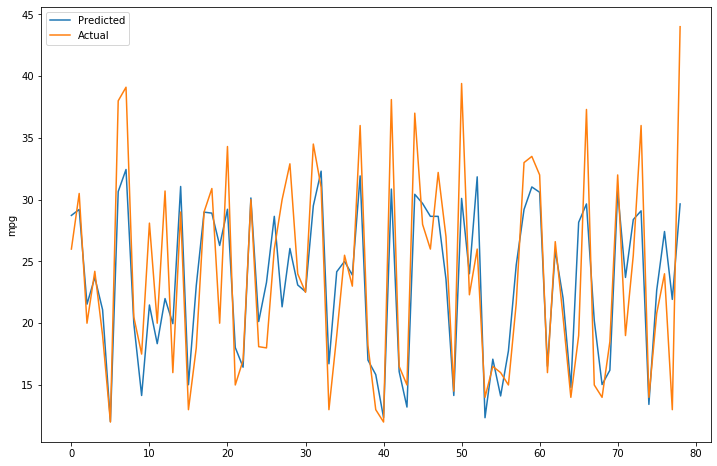

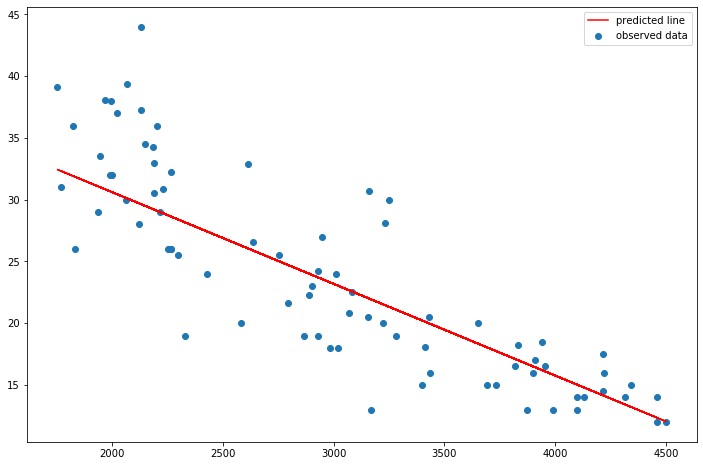

In [10]:
result_dict['mpg - single_linear'] = build_model ( linear_reg,
                                                   'mpg',
                                                   ['weight'],
                                                   data,
                                                   show_plot_Y = True,
                                                   show_plot_scatter = True)


#### building a simple linear regression with all feature " kitchen sink "
###### a simple linear regression with all features as input 
***

training_score :  0.6944977361463804
test_score :  0.7649014254576779


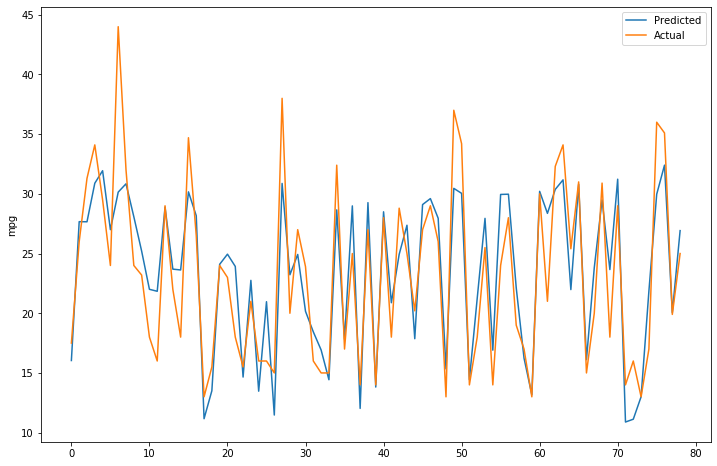

In [11]:
result_dict['mpg-kitchen_sink_linear'] = build_model(linear_reg,
                                                     'mpg',
                                                    ['cylinders',
                                                    'displacement',
                                                    'horsepower',
                                                    'weight',
                                                    'acceleration'],
                                                    data,
                                                    show_plot_Y = True)

#### we compare results of simple linear regression 
#### one feature versus 'kitchen sink' all features

In [12]:
compare_results()

Regression: mpg - single_linear
training_score 0.6846966325343997
test score  0.7162649204309544

Regression: mpg-kitchen_sink_linear
training_score 0.6944977361463804
test score  0.7649014254576779



####  bulding : 
#### lasso Regression  model
###### ~~ L1 regularization loss function 

***

In [13]:
# alpha constant to multiply the L1 term 
# higher the value of alpha implies more regularization 
def lasso_reg(x_train,y_train, alpha = 0.5):
    model = Lasso(alpha = alpha)
    model.fit(x_train, y_train)
    
    return model 

training_score :  0.7122363750938717
test_score :  0.6749551934008566


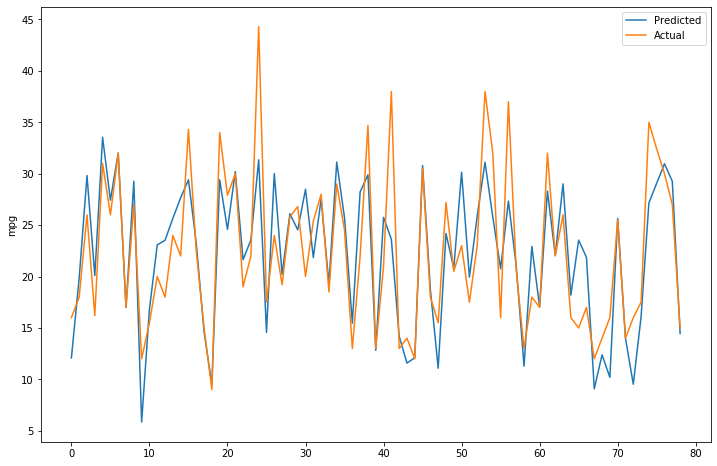

In [14]:
result_dict['mpg-kitchen_sink_Lasso'] = build_model(lasso_reg,
                                                     'mpg',
                                                    ['cylinders',
                                                    'displacement',
                                                    'horsepower',
                                                    'weight',
                                                    'acceleration'],
                                                    data,
                                                    show_plot_Y = True)

###### for our model to perform better on test data we increase alpha 

In [15]:
compare_results()

Regression: mpg - single_linear
training_score 0.6846966325343997
test score  0.7162649204309544

Regression: mpg-kitchen_sink_linear
training_score 0.6944977361463804
test score  0.7649014254576779

Regression: mpg-kitchen_sink_Lasso
training_score 0.7122363750938717
test score  0.6749551934008566



#### Ridge Regression
###### Reduces the mgnitude of regression coefficients 
###### ~~ L2 Norm loss function 
***

In [16]:
# alpha constant to multiply the L1 term 
def ridge(x_train,y_train, alpha = 0.5, normalize = True):
    model = Ridge(alpha = alpha, normalize = normalize)
    model.fit(x_train, y_train)
    
    return model 

training_score :  0.7103888997373384
test_score :  0.6774612123480099


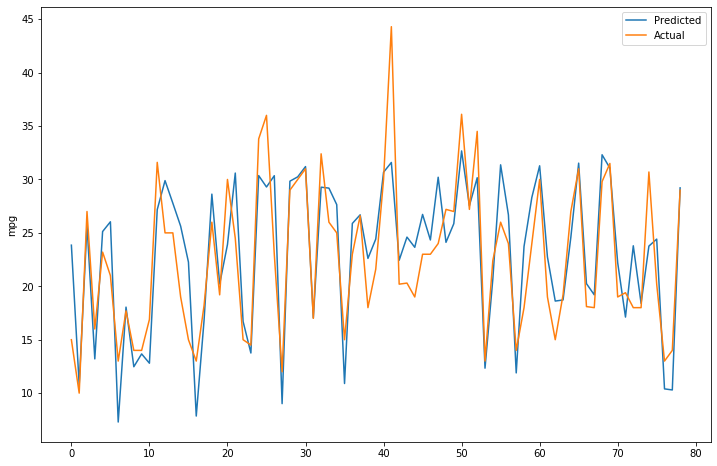

In [17]:
result_dict['mpg-kitchen_sink_Ridge'] = build_model(linear_reg,
                                                     'mpg',
                                                    ['cylinders',
                                                    'displacement',
                                                    'horsepower',
                                                    'weight',
                                                    'acceleration'],
                                                    data,
                                                    show_plot_Y = True)

### summary that compares results  of our built models 

In [18]:
compare_results()

Regression: mpg - single_linear
training_score 0.6846966325343997
test score  0.7162649204309544

Regression: mpg-kitchen_sink_linear
training_score 0.6944977361463804
test score  0.7649014254576779

Regression: mpg-kitchen_sink_Lasso
training_score 0.7122363750938717
test score  0.6749551934008566

Regression: mpg-kitchen_sink_Ridge
training_score 0.7103888997373384
test score  0.6774612123480099



### Elastic Net REgression
###### combination of Lasso and Ridge 

In [19]:
 def elastic_net_reg(x_train, y_train , alpha =1 , l1_ratio = 0.5, normalize = False, max_iter = 100000, warm_start = True, equivalent_to ="Elastic Net"):
    
        print("Equivalent to :", equivalent_to)
        
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, normalize=normalize, max_iter=max_iter, warm_start=warm_start)
        model.fit(x_train, y_train)
        
        return model 
    

Equivalent to : Elastic Net
training_score :  0.717707792978819
test_score :  0.6517417119009135


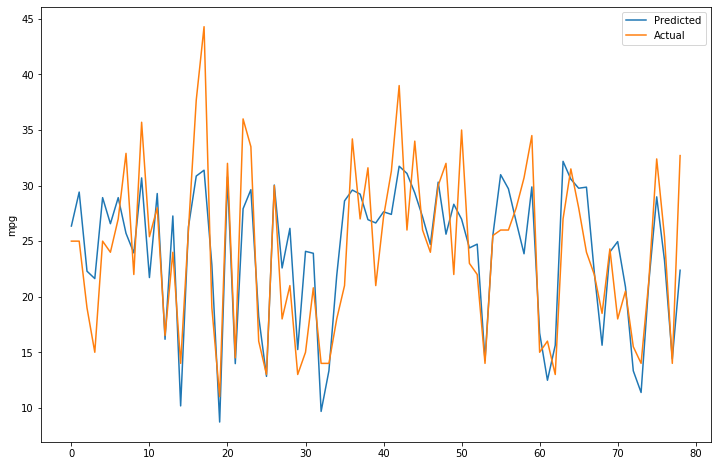

In [20]:
from functools import partial 
result_dict['mpg-kitchen_Elastic_Net_ols'] = build_model(partial(elastic_net_reg, 
                                                        alpha = 1, l1_ratio =0.5),
                                                     'mpg',
                                                    ['cylinders',
                                                    'displacement',
                                                    'horsepower',
                                                    'weight',
                                                    'acceleration'],
                                                    data,
                                                    show_plot_Y = True)

###### we notice that Elastic net performs better on test data compared to previos models 

### HyperParameter tuning Lasso Regression using Grid Search

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
X = data.drop(['mpg','age'], axis =1)
Y = data['mpg']

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size =0.2)

In [24]:
parameters = {'alpha':[0.2,0.4,0.6,0.8,0.9,1.0]}

grid_search = GridSearchCV(Lasso(),parameters, cv =3, return_train_score = True)
grid_search.fit(x_train, y_train)

grid_search.best_params_


{'alpha': 0.8}

In [26]:
lasso_model = Lasso(alpha = grid_search.best_params_['alpha']).fit(x_train,y_train)

In [28]:
y_pred = lasso_model.predict(x_test)

print('training_score',lasso_model.score(x_train, y_train ))
print('test_score',r2_score(y_test,y_pred))

training_score 0.7106628722559036
test_score 0.6791411063711805
